# Networks

## Introduction

This exercise will go over the basics on how to work with the `networkx` package to do network analysis. Note that we do not cover how to obtain network data in this notebook. Here, we start with an **edgelist**, or a dataset with two columns and each row indicating which nodes are connected. 

## Setup

First, we'll import python packages needed for the code in this notebook.  If you stop in the middle of this notebook, close it, then come back later to continue, make sure to run these imports each time you start up the notebook again.

In [181]:
import networkx as nx
import numpy as np
import pandas as pd
import operator

from sqlite3 import connect

# Allows plots to be showed inline 
import matplotlib
%matplotlib inline

## Importing data

First create a query to pull in all of the relations in the system.

In [5]:
# to create a connection to the database, 
conn = connect('awards.db')

In [150]:
awards = pd.read_sql('SELECT * from awards;', conn)
employees = pd.read_sql('SELECT * from employees UNION SELECT * from students;', conn).astype('str')

In [152]:
all_relations_nx = nx.from_pandas_edgelist(awards, 'employee', 'award')

In [153]:
len(employees)

632

In [154]:
all_nodes = pd.DataFrame({'node':[i for i in all_relations_nx.nodes]})
node_attributes = all_nodes.merge(employees, how = 'left', left_on = 'node',right_on = 'employee')
node_attributes = node_attributes[['node', 'occupation']]
node_attributes['occupation'] = ['AWARD' if id != id else id for id in node_attributes['occupation']]
node_attributes['occupation']

0       FACULTY
1         AWARD
2       FACULTY
3         AWARD
4       FACULTY
         ...   
1184    STUDENT
1185    STUDENT
1186    STUDENT
1187    STUDENT
1188    STUDENT
Name: occupation, Length: 1189, dtype: object

In [156]:
for i in range(len(node_attributes)):
    all_relations_nx.nodes[node_attributes['node'][i]]['Type'] = node_attributes['occupation'][i]

In [166]:
color_map = []
for node in node_attributes['occupation']:
    if node == 'FACULTY':
        color_map.append('blue')
    if node == 'AWARD':
        color_map.append('red')
    if node == 'STUDENT':
        color_map.append('green')

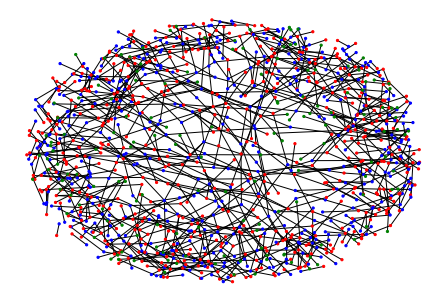

In [167]:
nx.draw(all_relations_nx, node_color=color_map, node_size = 5)

Next, we'll use the results of this query to make a list of all the employees, students, and awards in our data set.

Finally, we'll convert the overall data structure that was returned by our query into a `pandas` DataFrame and import the data into `networkx` from that DataFrame.

In [ ]:
# declare variables
all_relations_df = None
all_relations_nx = None # networkx (nx) representation of graph

# Convert all_data to a dataframe object
all_relations_df = pandas.DataFrame( all_graph_relations )

#print( all_relations_df )

# Adding a 'weight' column to see connections better
all_relations_df[ 'weight' ] = .01

# Use the networkx.from_pandas_dataframe() method to create
#     a networkx graph of all the data.
#     More info: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.convert_matrix.from_pandas_dataframe.html#from-pandas-dataframe
all_relations_nx = networkx.from_pandas_dataframe( all_relations_df, 'node1', 'node2', ['weight'] )

print( "networkx import --COMPLETE-- at " + str( datetime.datetime.now() ) )

### Visualizing a Graph in `networkx`

- back to [Table of Contents](#Table-of-Contents)

Now we will use the `networkx.draw()` function to draw the graph of the network we've created.  First, we will create a function that accepts a list of nodes and creates an associated list of color values for each node.

## Part 3 - Analyzing Networks

- back to [Table of Contents](#Table-of-Contents)

The networkx module also has built in tools to analyse graphs. The following measurements are used to assess how the nodes are related to each other in the graph database.

### Network Measures 

- back to [Table of Contents](#Table-of-Contents)

The following are some examples of traits of individual nodes and the overall network in a network graph that can be used to characterize network data:

- **Degree Centrality ** - counts the number of edges that an individual node has 

    - Nodes with a high degree of connections usually play an important role in a network
    - This can also be looked at in aggregate for all nodes in a graph to get an idea of the overall connectedness of the graph.  For example, calculate the mean and median degree centrality across all nodes to look at how connected a graph is, in general.

- **Betweenness ** - indicator of a node's centality in a network. 

    - Equal to the number of shortest paths from all vertices to all others that pass through that node
    - This also can be looked at in aggregate to characterize an entire network.

- **Diameter** - The longest shortest path over all pairs of nodes 

    - Often we want to find the shortest distance between two nodes; the diameter is the longest of these paths 
     - Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score

- **Cliques ** - A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.

The functions below are written for your conviencence by http://www.slideshare.net/arnicas/a-quick-and-dirty-intro-to-networkx-and-d3

In [182]:
def calculate_degree_centrality(graph):
    ''' 
    Calculate degree centrality of a node, sets value on node as attribute; returns graph, and dict of the degree centrality values.
	Also has code to print the top 10 nodes by degree centrality to console
    
    Parameters
    ----------
    graph - A Networkx object Graph 
	'''
    g = graph
    dc = nx.degree_centrality(g)
    nx.set_node_attributes(g, dc, 'degree_centrality')
    degcent_sorted = sorted(dc.items(), key = operator.itemgetter(1), reverse = True)
    for key, value in degcent_sorted[0:10]:
        print( "Highest degree Centrality:" + str( key ) + " - " + str( value ) )
    return graph, dc 


In [183]:
def calculate_betweenness(graph):
    ''' 
    Calculate betweenness centrality of a node, sets value on node as attribute; returns graph, and dict of the betweenness centrality values

    Parameters
    ----------
    graph - A Networkx object Graph 
    '''
    g = graph
    bc=nx.betweenness_centrality(g)
    nx.set_node_attributes(g,bc,'betweenness')
    degcent_sorted = sorted(bc.items(), key = operator.itemgetter(1), reverse = True)
    for key, value in degcent_sorted[0:10]:
        print( "Highest Betweeness:" + str( key ) + " - " + str( value ) )
    return g #, bc



In [184]:
def find_cliques(graph):
	''' 
    Calculate cliques and return as sorted list.  Print sizes of cliques found.
    
    Parameters
    ----------
    graph - A Networkx object Graph 
	'''
	g = graph
	cl = nx.find_cliques(g)
	cl = sorted(list( cl ), key=len, reverse=True)
	print( "Number of cliques: " + str( len(cl) ) )
	cl_sizes = [len(c) for c in cl]
	print( "Size of cliques:" + str( cl_sizes ) )
	return cl



In [185]:
def find_diameter(graph):
    """
    Calculate the Diameter of a graph
    
    Parameters
    ----------
    graph - A Networkx object Graph    
    """
    diameter = nx.diameter(graph)
    print( "Diameter: " + str( diameter ) )
    return diameter



### Exercise - Calculating Network Metrics

- back to [Table of Contents](#Table-of-Contents)

Perform some exploritory analysis on the full data. Use the funtions above to:

1. Obtain a list of the highest 10 levels of Degree Centrality
2. Obtain a list of the highest 10 levels of Betweenness
3. The number of cliques and the sizes of those cliques. 

By looking at these results, what do you think about the shape of the graph? How would you charaterize the relationships in the graph? 

In [186]:
print( "_________________DEGREE CENTRALITY ________________" )
calculate_degree_centrality( all_relations_nx )
print( "_________________Betweenness ________________" )
calculate_betweenness( all_relations_nx )
print( "_________________Cliques ________________" )
find_cliques( all_relations_nx )
print( "__________________________________________" )

_________________DEGREE CENTRALITY ________________
Highest degree Centrality:aw1261 - 0.00505050505050505
Highest degree Centrality:aw1007 - 0.003367003367003367
Highest degree Centrality:aw1008 - 0.003367003367003367
Highest degree Centrality:aw1009 - 0.003367003367003367
Highest degree Centrality:aw1010 - 0.003367003367003367
Highest degree Centrality:aw1011 - 0.003367003367003367
Highest degree Centrality:aw1012 - 0.003367003367003367
Highest degree Centrality:aw1022 - 0.003367003367003367
Highest degree Centrality:aw1023 - 0.003367003367003367
Highest degree Centrality:aw1027 - 0.003367003367003367
_________________Betweenness ________________
Highest Betweeness:aw1012 - 0.0094897302142458
Highest Betweeness:aw1013 - 0.00943441718504903
Highest Betweeness:aw1014 - 0.009376267590252426
Highest Betweeness:aw1015 - 0.009228766179061041
Highest Betweeness:1646 - 0.008959292447076777
Highest Betweeness:90008389 - 0.008902561135080091
Highest Betweeness:90024642 - 0.008806117904685723
H

### Exercise - Analyzing a Sub Graph 

- back to [Table of Contents](#Table-of-Contents)

From looking at the measures above, it seems like our graph has a lot of independent units that are not connected to the larger graph. For instances, there are a lot of cliques with length 2. This indicates one employee working on one award. Let's say we are interested in the sub-network where all the nodes are connected. 

Preform the same exploritory analysis on the subset created below. The subset is the largest connected set of nodes in the graph. 

Use the funtions above to:

1. Obtain a list of the highest 10 levels of Degree Centrality
2. Obtain a list of the highest 10 levels of Betweenness
3. The number of cliques and the sizes of those cliques
4. Find the Diameter of the Subgraph
    
By looking at these results, what do you think about the shape of the graph? how would you charaterized the relationships in the graph? 

In [ ]:
# Create the Subgraph 
subgraph_generator = max( networkx.connected_components( all_relations_nx ), key = len )

subgraph_graph = all_relations_nx.subgraph( subgraph_generator )

# Keep track of descriptive counters
num_awards = 0
num_faculty = 0
num_students = 0

# visualize the network       

# declare variables
subgraph_nodes = None
color_values = []
node_counter = -1
node = None
py2neo_node = None
node_properties_dict = None
node_id = 0
node_type = None

# set colors of nodes:
subgraph_nodes = subgraph_graph.nodes( data = True )
color_values = calculate_color_values_for_nodes( subgraph_nodes )

# loop over nodes to get counts of each type.

# use networkx graph.nodes() method to retrieve just list of nodes
subgraph_nodes = subgraph_graph.nodes( data = True )

# loop over nodes
node_counter = 0
for node in subgraph_nodes:
    
    # initialize variables
    node_id = 0
    node_type = None
    
    # get the node's properties (still a reference to py2neo.types.Node)
    py2neo_node = node[ 0 ]
    node_properties_dict = dict( py2neo_node )

    #print( "node[ 0 ] type = " + str( type( py2neo_node ) ) )
    
    # Is there an employee ID?
    if "employeeid" in node_properties_dict:

        # yes - it is ID, and also get position.
        node_id = node_properties_dict.get( "employeeid", None )
        node_type = node_properties_dict.get( "position", None )

    else:

        # no employee ID, so award.
        node_id = node_properties_dict.get( "award_num", None )
        node_type = "AWARD"
        
    #-- END check to see if employee ID. --#

    # What type?
    if node_type == "FACULTY":

        # FACULTY = green
        num_faculty += 1

    elif node_type == "STUDENT":

        # STUDENT = yellow
        num_students += 1

    else:

        # other = AWARD = red
        num_awards += 1
        
    #-- END check to see what type based on position --#
    
#-- END loop over nodes to get type counts --#
        
# draw the graph
networkx.draw( subgraph_graph, node_color = color_values )

# retrieve person data
person_data = list(networkx.get_node_attributes( subgraph_graph, 'position' ).values())

print( 'Number of Awards: ' + str( num_awards ) )
print( 'Number of Students: ' + str( num_students ) )
print( 'Number of Faculty: ' + str( num_faculty ) )

In [ ]:
print( "_________________DEGREE CENTRALITY ________________" )
calculate_degree_centrality( subgraph_graph )
print( "_________________Betweenness ________________" )
calculate_betweenness( subgraph_graph )
print( "_________________Cliques ________________" )
find_cliques( subgraph_graph )
print( "_________________Diameter ________________" )
find_diameter( subgraph_graph )
print( "______________________________________________" )

### Plotting Network Metrics

- back to [Table of Contents](#Table-of-Contents)

Betweeness and Centrality are both measures on how connnected a node is to its surounding nodes. However, they measure connectiveness in slightly different ways. A Node with high Degree centrality does not nessasarily mean the node also has a high level a Betwennness Centrality.

   A node with high betweenness but low degree might indicated that a node's few connections are critical to the shape of the graph

   A node with high degree but low betweenness might indicate that a node's connections are redundent and connections can bypass that node
    
    
### Exercise - degree vs. betweeness centrality

- back to [Table of Contents](#Table-of-Contents)

Run the Cell below to create a scatterplot of betweeness vs centrality of our subgraph

In [ ]:
dc_data = list( networkx.degree_centrality( subgraph_graph ).values() )
bw_data = list( networkx.betweenness_centrality( subgraph_graph ).values() )

import numpy as np
import matplotlib.pyplot as plt

x = dc_data
y = bw_data

plt.scatter(x, y)

#title
plt.title("Betweenness vs Centrality")

#labels
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.show()

## Part 4 - Analysing Graphs

- back to [Table of Contents](#Table-of-Contents)

### Exercise - function that plots centrality metrics

- back to [Table of Contents](#Table-of-Contents)

1) Write a function that plots histgrams of the Degree of Centrality and Betweenness for a given graph.  The function should accept a networkx graph as an input parameter and return nothing.
 
2) Use the find_cliques() function to find the number of cliques in the graph 
 
3) Based of the graph you created above, the number of cliques, and the histograms of Centrality and Betweenness, how would you discribe the community this graph represents? 
 
Hint: Use networkx documentation to find a function that allows you to collect the attributes of a node 

In [ ]:
# Your soultion should Look somthing Like this 

def graph_data(graph):
    """
    Creates histograms of the the Degree of Centrality and the Betweenness Centrality 
    
    Parameters
    ----------
    graph - A Networkx object Graph. Graph nodes must have degree_centrality and betweenness attributes
    
    """
    # Create an empty list to hold all of our degree_centrality items  
    cen_list = []
    # Use the built in function get_node_attributes to collect the degree_centrality for each node
    for item in networkx.get_node_attributes(graph, 'degree_centrality'):
        cen_list.append(networkx.get_node_attributes(graph, 'degree_centrality')[item])
    
    # Pass the cen_list to a plt object and plot as a histogram 
    plt.figure(1)
    #title
    plt.title("Degree Centrality")

    #labels
    plt.xlabel("Degree Centrality")
    
    plt.hist(cen_list)
    
    # Create an empty list to hold all of our eigen_cent items 
    bw_list = []
    # Use the built in function get_node_attributes to collect the eigen_cent for each node
    for item in networkx.get_node_attributes(graph, 'betweenness'):
        bw_list.append(networkx.get_node_attributes(graph, 'betweenness')[item])
    
    # Pass the eig_list to a plt object and plot as a histogram 
    plt.figure(2)
    #title
    plt.title("Betweeness Centrality")

    #labels
    plt.xlabel("Betweeness Centrality")
    plt.hist(bw_list)

    
# Call the function graph_data() on our Networkx graph 
graph_data( subgraph_graph )



In [ ]:
# Call the fucntion find_cliques() on our Networkx graph 
find_cliques( subgraph_graph )